In [12]:
import pandas as pd
df = pd.read_csv("just tacos and burritos.csv")


In [18]:
X = df.iloc[:,:26].values
for idx, val in enumerate(df):
    if idx < 26:
        print(idx, ": ", val)

0 :  id
1 :  address
2 :  categories
3 :  city
4 :  country
5 :  cuisines
6 :  dateAdded
7 :  dateUpdated
8 :  keys
9 :  latitude
10 :  longitude
11 :  menuPageURL
12 :  menus.amountMax
13 :  menus.amountMin
14 :  menus.category
15 :  menus.currency
16 :  menus.dateSeen
17 :  menus.description
18 :  menus.name
19 :  name
20 :  postalCode
21 :  priceRangeCurrency
22 :  priceRangeMin
23 :  priceRangeMax
24 :  province
25 :  websites


In [61]:
taco_burrito_ratios = {}
cities = set(df["city"])
for city in cities:
    burritos = 0
    tacos = 0
    vals = [val.lower() for val in df[df["city"] == city].iloc[:,18].values]
    for item in vals:
        if 'burrito' in item: burritos += 1
        elif 'taco' in item: tacos += 1
    if tacos > 0: taco_burrito_ratios[city] = burritos/tacos

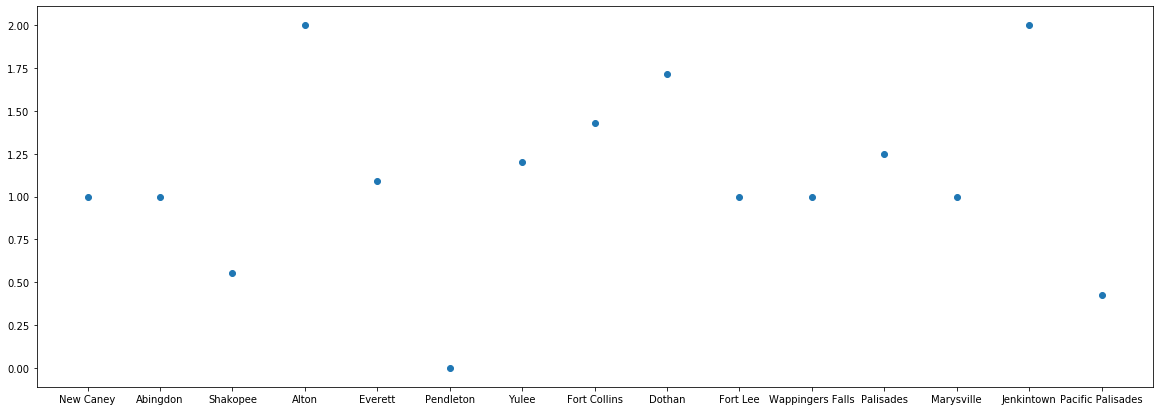

In [60]:
import random
from matplotlib import pyplot as plt
plt.figure(figsize=(20,7))
random_keys = random.sample(list(taco_burrito_ratios), 15)
random_values = [taco_burrito_ratios[random_key] for random_key in random_keys]
plt.scatter(random_keys, random_values)
plt.show()

In [84]:
# takeout
coordinates = []
for idx, category in enumerate(df["categories"]):
    if "takeout" in category.lower():
        lat, long = df.iloc[idx, 9], df.iloc[idx, 10]
        coordinates.append((lat, long))

print(len(set(coordinates)))

4


In [83]:
# which mexican restaurants with most locations
# missing delivery
coordinates = []
for idx, category in enumerate(df["categories"]):
    if "delivery" in category.lower():
        lat, long = df.iloc[idx, 9], df.iloc[idx, 10]
        coordinates.append((lat, long))

print(len(set(coordinates)))

68


In [97]:
import numpy as np
max_prices = []
min_prices = []
for idx, description in enumerate(df["menus.description"]):
    if description is not np.nan and "authentic" in description.lower():
        if df.iloc[idx,23] is not np.nan:
            max_prices.append(df.iloc[idx,23])
        if df.iloc[idx,24] is not np.nan:
            min_prices.append(df.iloc[idx,24])

print(set(max_prices))

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 25.0, nan, nan, 30.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 40.0, 55.0}


In [134]:
cuisines_max = []
for idx, price in enumerate(df["priceRangeMax"]):
    if price > 15:
        cuisines_max.append(df.iloc[idx,5])


In [135]:
cuisines_min = []
for idx, price in enumerate(df["priceRangeMin"]):
    if price < 8:
        cuisines_min.append(df.iloc[idx,5])

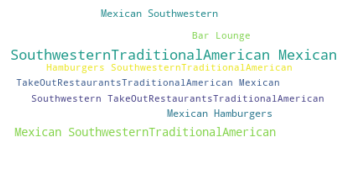

In [143]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
words = ""
for string in cuisines_max:
    if string is not np.nan:
        words += "".join(string.split(" "))
wordcloud = WordCloud(background_color="white", 
               max_words=50, 
               min_font_size =10.5, 
               max_font_size=50, 
               relative_scaling = 0.5, 
               normalize_plurals= True).generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

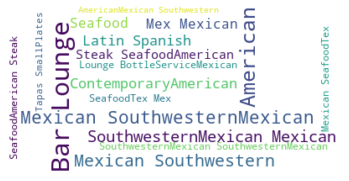

In [157]:
words = ""
for string in cuisines_min:
    if string is not np.nan:
        words += "".join(string.split(" "))
wordcloud = WordCloud(background_color="white", 
               max_words=50, 
               min_font_size =10, 
               max_font_size=30, 
               relative_scaling = 0.4, 
               normalize_plurals= True).generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
x1_file = pd.read_excel('RandomSampleRes.xlsx', sheet_name = 'Sheet1')
late_list = []
for idx, time in enumerate(x1_file["Time"]):
    if "hrs" in time or "hours" in time or int(time[-4:-2]) >= 10:
        late_list.append(x1_file["Restaurant"][idx])
print(late_list)

In [ ]:
cuisines_late = []
for idx, cuisine in enumerate(df["cuisines"]):
    if df.iloc[idx,19] in late_list:
        cuisines_late.append(cuisine)
print(cuisines_late)

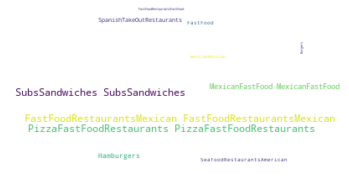

In [186]:
words = ""
for string in categories_late:
    if string is not np.nan:
        words += "".join(string.split(" "))
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()